<a href="https://colab.research.google.com/github/BeardedBaldo/BasicConvnet_Pytorch/blob/main/PytorchBasic_FMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
### loading libraries
import torch 
import torch.nn as nn
import torchvision as tv
import torch.nn.functional as func
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import torchvision.transforms as transforms

In [66]:
### load datasets

## transform - normalize and convert to tensor
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])

## load traindata
trainSet = tv.datasets.FashionMNIST(root = './data/', train = True, transform=transform, download = True)
trainLoader = torch.utils.data.DataLoader(trainSet, batch_size=5, num_workers=2)

## load test data
testSet = tv.datasets.FashionMNIST(root = './data/', train = False, transform=transform, download = True)
testLoader = torch.utils.data.DataLoader(testSet, batch_size=5, num_workers=2)


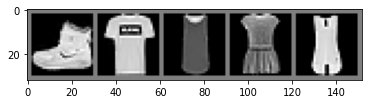

Labels:  ankle boot t-shirt/top t-shirt/top dress t-shirt/top


In [67]:
### view and load images
classes = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal',
           'shirt', 'sneaker', 'bag', 'ankle boot']

def showImage(image):
  image = image*0.5 + 0.5 
  plt.imshow(np.transpose(image.numpy(), (1,2,0)))
  plt.show()

dataiter = iter(trainLoader)
images, labels = dataiter.next()
showImage(tv.utils.make_grid(images))
print("Labels: ", " ".join([classes[labels[i]] for i in range(5)]))

In [81]:
### define convnet model

class fmnistConvnet(nn.Module):
  def __init__(self):
    super(fmnistConvnet, self).__init__()
    self.conv1 = nn.Conv2d(1, 16, 2)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(16, 32, 2)
    self.conv3 = nn.Conv2d(32, 64, 2)
    self.linear1 = nn.Linear(64 * 5 * 5, 256)
    self.linear2 = nn.Linear(256, 128)
    self.linear3 = nn.Linear(128, 64)
    self.linear4 = nn.Linear(64, 10)

  def forward(self, x):
    x = self.pool(func.relu(self.conv1(x)))
    x = self.pool(func.relu(self.conv2(x)))
    x = func.relu(self.conv3(x))
    x = x.view(-1, 64 * 5 * 5)
    x = func.relu(self.linear1(x))
    x = func.relu(self.linear2(x))
    x = func.relu(self.linear3(x))
    x = func.softmax(self.linear4(x))

    return x

model = fmnistConvnet()

In [82]:
### define optimizers and losses
optimizer = optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

In [83]:
epochs = 2

for epoch in range(epochs):
  runningLoss = 0
  for i, data in enumerate(trainLoader, 0):
    input, label = data

    optimizer.zero_grad()

    output = model(input)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    runningLoss += loss.item()
    if i % 1000 == 999:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, runningLoss / 1000))
        runningLoss = 0.0

print("finished training")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[1,  1000] loss: 1.917
[1,  2000] loss: 1.790
[1,  3000] loss: 1.756
[1,  4000] loss: 1.727
[1,  5000] loss: 1.717
[1,  6000] loss: 1.706
[1,  7000] loss: 1.700
[1,  8000] loss: 1.702
[1,  9000] loss: 1.703
[1, 10000] loss: 1.703
[1, 11000] loss: 1.714
[1, 12000] loss: 1.711
[2,  1000] loss: 1.709
[2,  2000] loss: 1.743
[2,  3000] loss: 1.740
[2,  4000] loss: 1.735
[2,  5000] loss: 1.688
[2,  6000] loss: 1.693
[2,  7000] loss: 1.751
[2,  8000] loss: 1.706
[2,  9000] loss: 1.748
[2, 10000] loss: 1.745
[2, 11000] loss: 1.780
[2, 12000] loss: 1.761
finished training


In [75]:
total = 0
correct = 0

with torch.no_grad():
  for data in testLoader:
    input, label = data
    outputs = model(input)
    _, predicted = torch.max(outputs, 1)
    total += label.size(0)
    correct += (predicted == label).sum().item()

print("Accuracy of the model is: ", (correct/total) * 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of the model is:  70.37
